# Tarea 16 Adán Rubiol

__Ejercicio 1__: ¿Cómo podemos evaluar funciones en matrices?

La operacion bien definida en matrices son la composición 

Así si tenemos una función  $F(x)$ y la evaluamos en A

Tomamos su expansión de Taylor;


$$F(A)= \sum_{n=0}^{\infty} \frac{F^{(n)}(0)}{n!}A^{n}$$ 

con  $$A^{n}=A\circ A\circ  A \circ A..  n-veces$$, es decir la multiplicar la matriz n veces así;

$$e^{A} =  \sum_{n=0}^{\infty} \frac{A^{n}}{n!}$$

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

Se define una matriz A simétrica si A es igual a su transpuesta
$A=A^{T}$ así para cualquier elemento se verifica $a_{ij}=a_{ji}$

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Dada cualquier matriz cuadrada A calculamos su transpuesta A' y así la suma A=A+A' será una matriz simétrica.

In [16]:
a=rand(8,8)

8×8 Array{Float64,2}:
 0.712562   0.398402   0.605542   …  0.374803  0.271385   0.840312 
 0.383767   0.417989   0.0764795     0.867113  0.166878   0.458455 
 0.0747538  0.0513964  0.770908      0.487486  0.716882   0.544068 
 0.244139   0.921669   0.717699      0.547398  0.882649   0.817036 
 0.483402   0.544814   0.760151      0.93382   0.960176   0.899292 
 0.875378   0.193156   0.0566382  …  0.702781  0.739133   0.580863 
 0.0432942  0.536618   0.494989      0.364708  0.326361   0.0837153
 0.822032   0.0155948  0.185764      0.36305   0.0767812  0.396881 

In [17]:
a'


8×8 Array{Float64,2}:
 0.712562  0.383767   0.0747538  …  0.875378    0.0432942  0.822032 
 0.398402  0.417989   0.0513964     0.193156    0.536618   0.0155948
 0.605542  0.0764795  0.770908      0.0566382   0.494989   0.185764 
 0.806199  0.456957   0.654851      0.00550764  0.895988   0.997896 
 0.318127  0.384012   0.615998      0.314123    0.384261   0.831714 
 0.374803  0.867113   0.487486   …  0.702781    0.364708   0.36305  
 0.271385  0.166878   0.716882      0.739133    0.326361   0.0767812
 0.840312  0.458455   0.544068      0.580863    0.0837153  0.396881 

In [18]:
A=a+a'

8×8 Array{Float64,2}:
 1.42512   0.782168  0.680295  1.05034   …  1.25018   0.314679  1.66234 
 0.782168  0.835979  0.127876  1.37863      1.06027   0.703495  0.47405 
 0.680295  0.127876  1.54182   1.37255      0.544124  1.21187   0.729832
 1.05034   1.37863   1.37255   1.48595      0.552905  1.77864   1.81493 
 0.801529  0.928826  1.37615   1.40222      1.24794   1.34444   1.73101 
 1.25018   1.06027   0.544124  0.552905  …  1.40556   1.10384   0.943913
 0.314679  0.703495  1.21187   1.77864      1.10384   0.652723  0.160496
 1.66234   0.47405   0.729832  1.81493      0.943913  0.160496  0.793763

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} 1 & 1\\ -1 & 1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.

In [19]:
A=[-1 1; -1 -1]#se define la matriz A

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [20]:
vals=eigvals(A)

2-element Array{Complex{Float64},1}:
 -1.0+1.0im
 -1.0-1.0im

In [21]:
D=diagm(exp.(vals)) 

2×2 Array{Complex{Float64},2}:
 0.198766+0.30956im       0.0+0.0im    
      0.0+0.0im      0.198766-0.30956im

In [22]:
w=eigvecs(A)

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

In [23]:
expA=w*D*inv(w)

2×2 Array{Complex{Float64},2}:
 0.198766+0.0im   0.30956+0.0im
 -0.30956+0.0im  0.198766+0.0im

In [24]:
f(x,t)=(expA)*[x[1],x[2]]#tomamos la función de evolución para exp(A)

f (generic function with 1 method)

In [25]:
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [26]:
list=0:0.01:100;
vec=euler(f,list,[1,0]);#por el método de euler resolvemos el sistema

In [27]:
listx1=map(x->x[1],vec);
listx2=map(x->x[2],vec);

In [28]:
using PyPlot

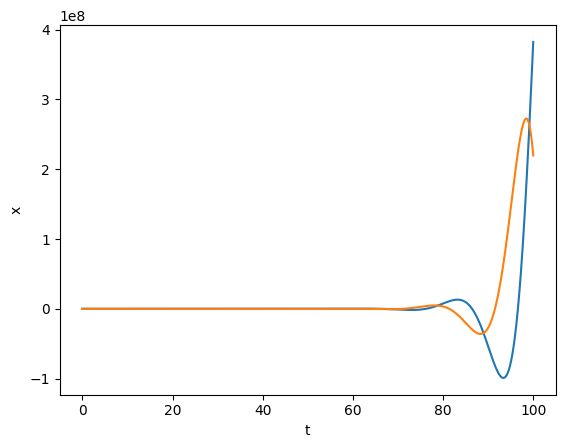

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PyObject <matplotlib.text.Text object at 0x7f93f8f16810>

In [29]:
plot(list,listx1)
plot(list,listx2);
xlabel("t");ylabel("x")
# Ahora se grafica x vs t 

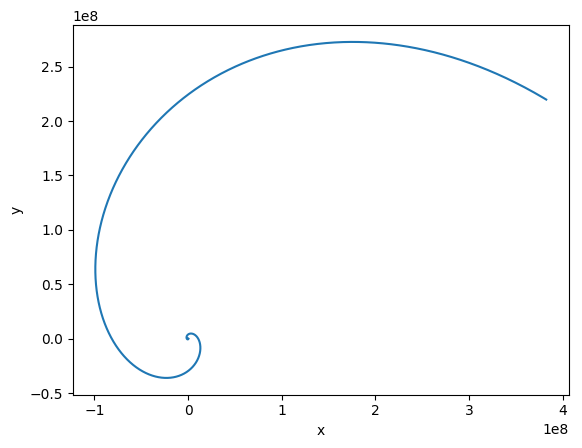

PyObject <matplotlib.text.Text object at 0x7f93f8e6c5d0>

In [30]:
plot(listx1,listx2)
xlabel("x");ylabel("y")
#se grafica X vs Y